In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
import seaborn as sns

Dataset Description

In [2]:
# Load data
df = pd.read_csv("Facebook_Marketplace_data.csv")
df.shape

(7050, 16)

In [3]:
# Read dataset description
df.describe

<bound method NDFrame.describe of       status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  n

In [4]:
# Read topmost row of the datase
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
# list all columns
df.columns.tolist()

['status_id',
 'status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys',
 'Column1',
 'Column2',
 'Column3',
 'Column4']

In [6]:
# Check null
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
# Check duplicated
df.duplicated().sum()

0

Preprocessing

In [8]:
# Drop unnecessary columns
df = df.drop(columns=["Column1", "Column2", "Column3", "Column4", "status_id", "status_type", "status_published"])
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


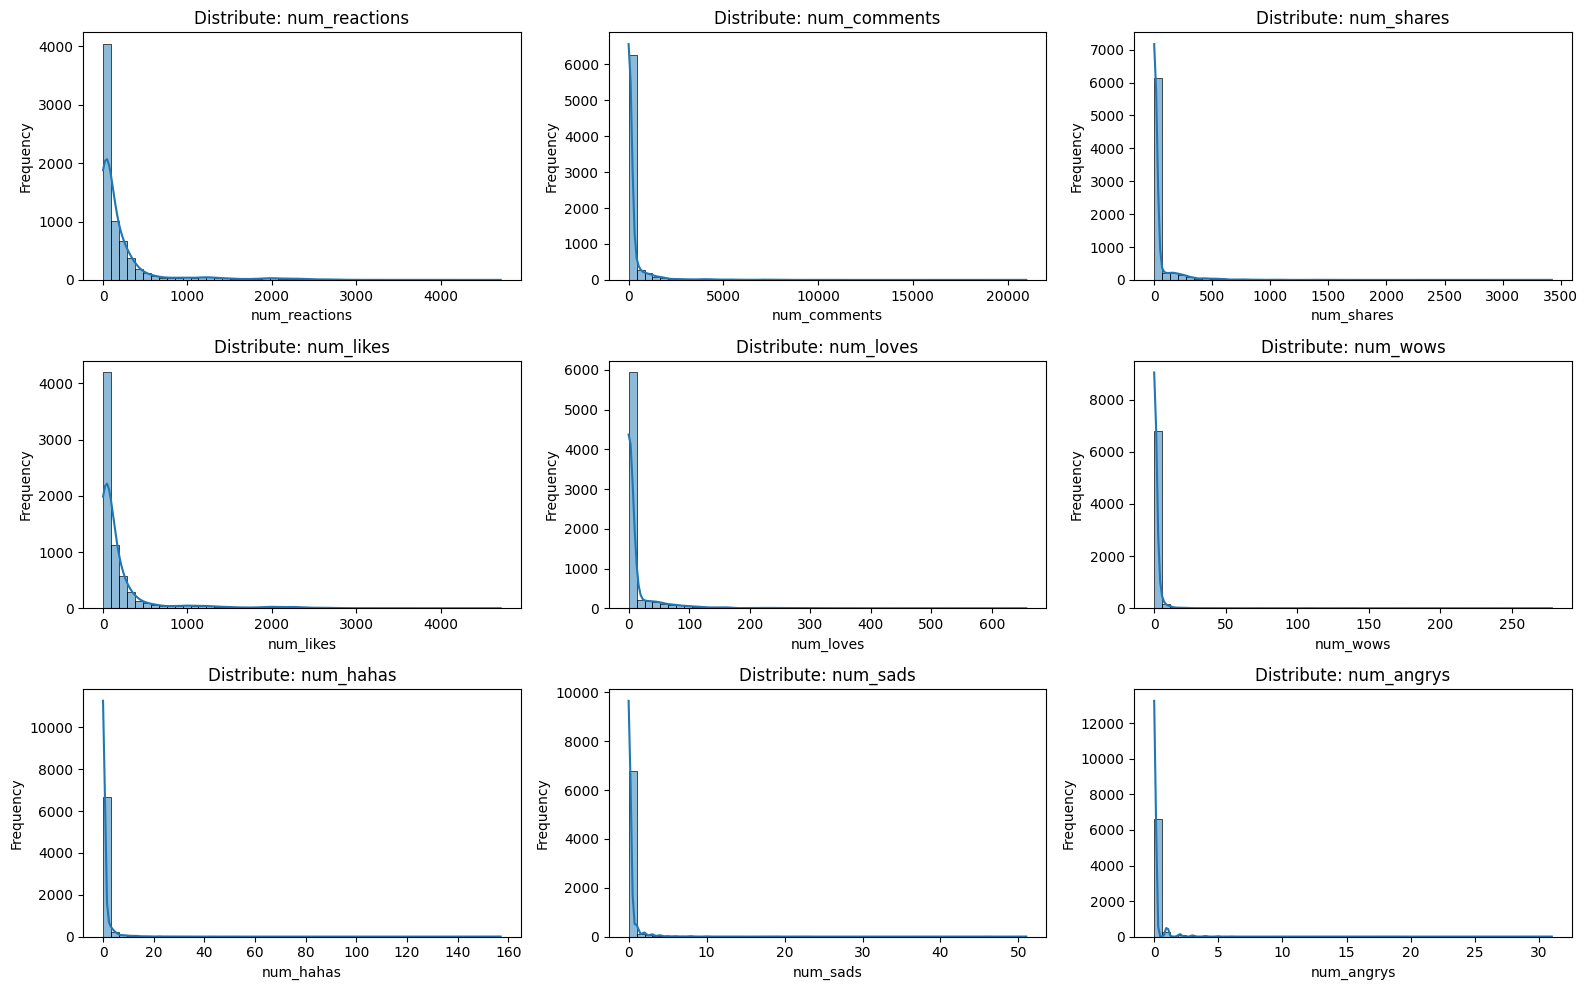

In [9]:
# Plot distributions
plt.figure(figsize=(16, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f"Distribute: {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

K-Mean Clustering

In [11]:
# Get optimal cluster ammount (Elbow & Silhouette Score)
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

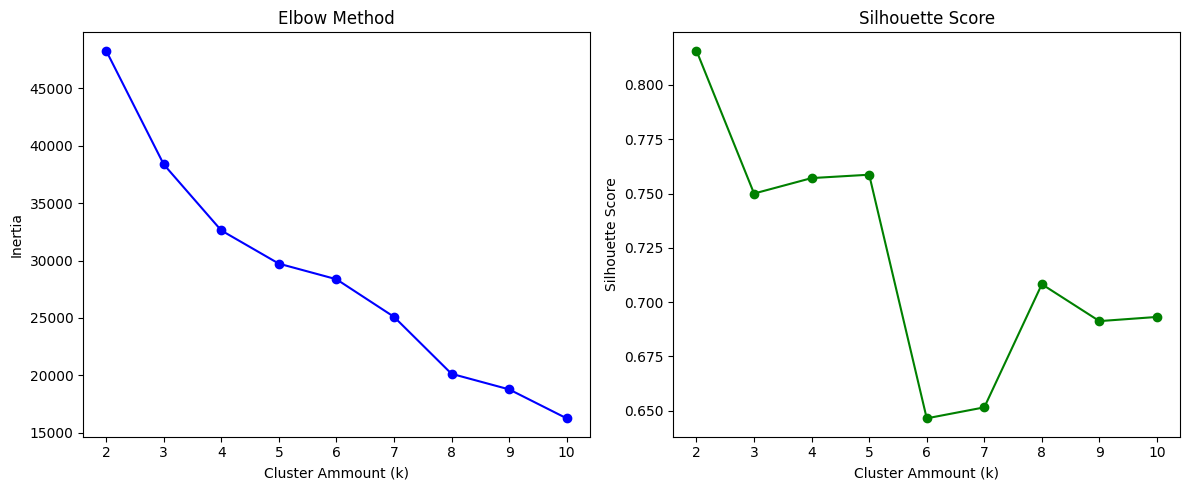

In [12]:
# Visualization Elbow & Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Cluster Ammount (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Cluster Ammount (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [13]:
# Clustering final using best K (use k = 3)
kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans_final.fit_predict(X_scaled)

In [14]:

# Reducing Dimension for Visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

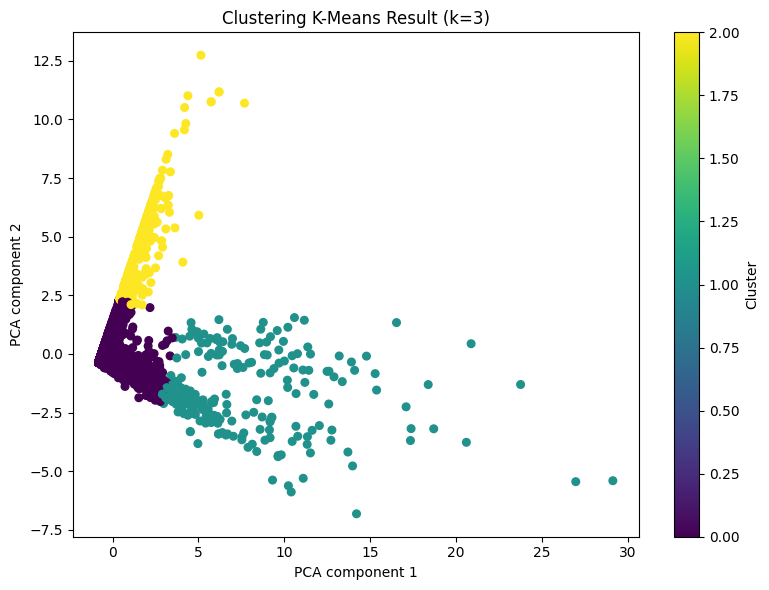

In [15]:
# Visualisasi forr clustering result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.title("Clustering K-Means Result (k=3)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

Hierarchical Clustering

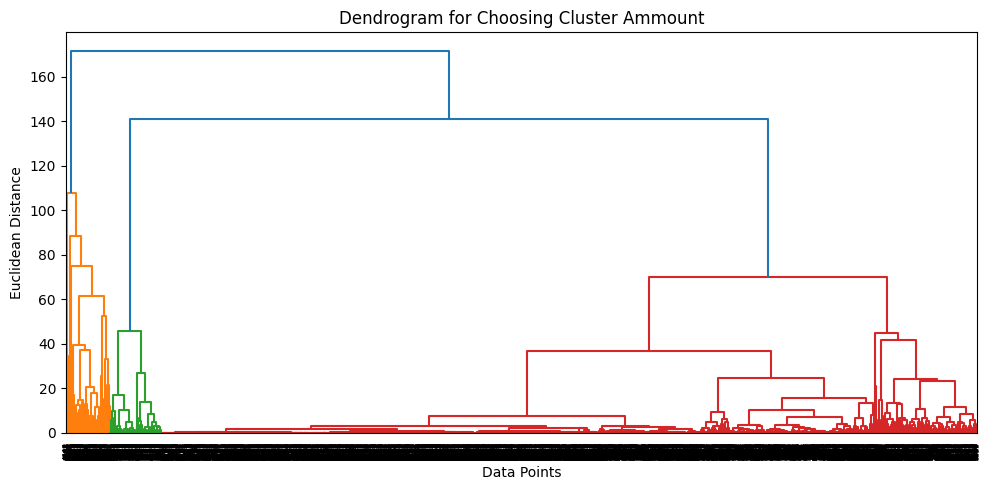

In [16]:
# Dendrogram Plotting
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Choosing Cluster Ammount")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

In [17]:
# Hierarchical Clustering (cluster ammount = 3)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

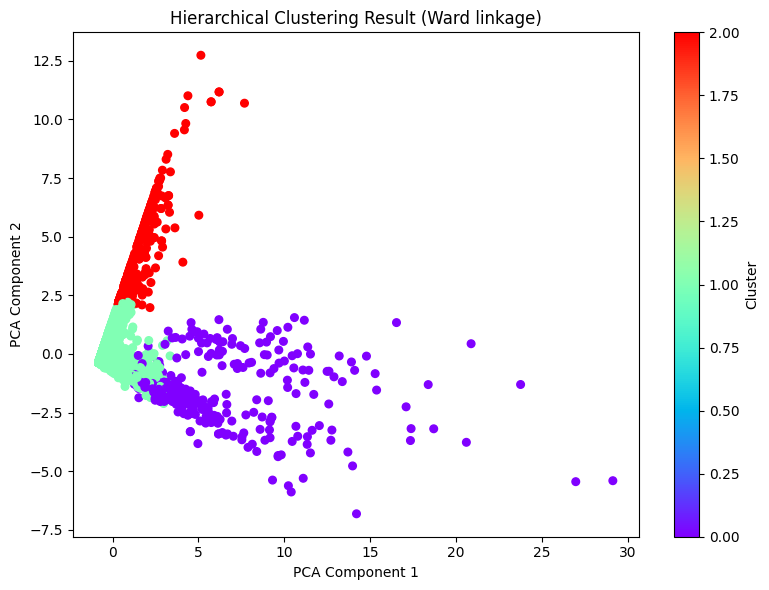

In [18]:
# Clustering Result Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering Result (Ward linkage)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

DBScan

In [19]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5) 
db_labels = dbscan.fit_predict(X_scaled)

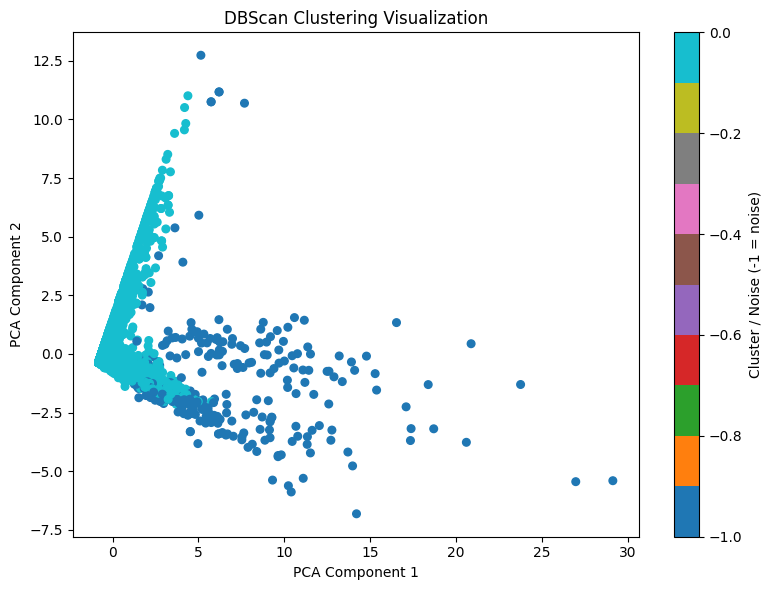

In [20]:
# DBScan Result Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', s=30)
plt.title("DBScan Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster / Noise (-1 = noise)")
plt.tight_layout()
plt.show()

Evaluation and Comparison

In [21]:
# PCA for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

In [22]:
# Save Label Result from every Algorithm
kmeans_labels = kmeans.labels_
hierarchical_labels = hc.labels_
dbscan_labels = dbscan.labels_

In [23]:
# Calculate Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
# DBSCAN can have -1 (noise), make sure cluster ammounnt > 1 before calculating
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1  

print("Silhouette Score KMeans: ", round(kmeans_silhouette, 3))
print("Silhouette Score Hierarchical: ", round(hierarchical_silhouette, 3))
print("Silhouette Score DBSCAN: ", round(dbscan_silhouette, 3))

Silhouette Score KMeans:  0.693
Silhouette Score Hierarchical:  0.749
Silhouette Score DBSCAN:  0.82


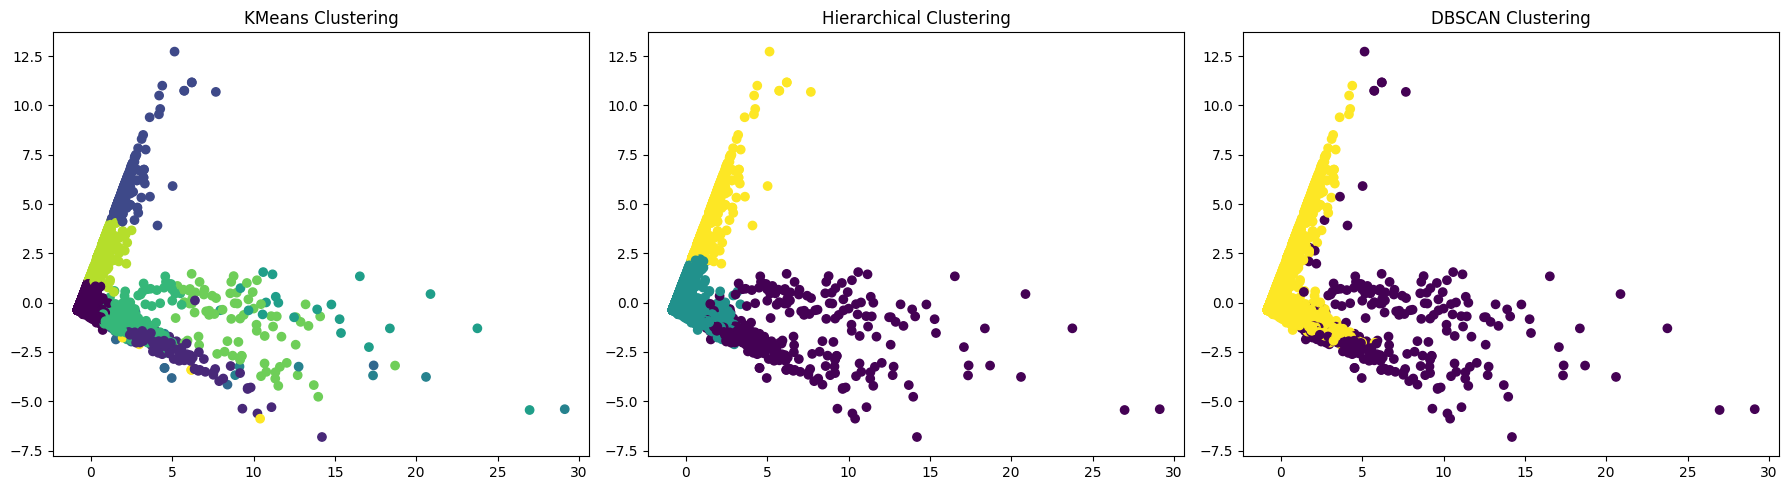

In [24]:
# Clustering Visualization with PCA
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title('KMeans Clustering')

axs[1].scatter(data_pca[:, 0], data_pca[:, 1], c=hierarchical_labels, cmap='viridis')
axs[1].set_title('Hierarchical Clustering')

axs[2].scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis')
axs[2].set_title('DBSCAN Clustering')

plt.tight_layout()
plt.show()